## 6. Time-Frequency Analysis
This module covers essential methods for analyzing **non-stationary** biomedical signals, such as EEG, whose frequency content changes over time.

---

### 6.1. Introduction: The Necessity of Time-Frequency

#### 6.1.1. Limitations of the Fourier Transform (FT)
* **Time Elimination:** The standard FT calculates the overall frequency content of a signal by averaging it across the entire duration, thus **losing all temporal information**.
* **Stationarity Assumption:** FT is only appropriate for **stationary** signals. Bio-signals are non-stationary, requiring a method to display **both time and frequency information simultaneously**.

#### 6.1.2. Applications
Time-frequency analysis is suitable for non-stationary signals like **speech** and **bio-signals**. Its applications include:
* **Analysis:** Visualizing changes in power across time and frequency.
* **Detection:** Identifying sudden, localized events (e.g., EEG spikes).
* **Feature Extraction:** Generating features for classification.

---

### 6.2. Short-Time Fourier Transform (STFT)

#### 6.2.1. The Basic Concept
* **Mechanism:** The FT is made time-dependent by applying a **time-localized window $h(s)$** to the signal $x(s)$. The window is slid across the signal.
* **Spectrogram:** The time-frequency representation, or **spectrogram**, is the squared magnitude of the STFT:
    $$\text{SPEC}_{x}(t, f) = |X_{STFT}(t, f)|^2$$

#### 6.2.2. The Fixed Resolution Challenge
* **Resolution Dependence:** Both the time and frequency resolution are determined by the **fixed length** of the window $h(s)$.
* **Time-Frequency Trade-off (Uncertainty Principle):**
    * **Narrow Window (Good Time Resolution):** Leads to **poor frequency resolution**.
    * **Wide Window (Good Frequency Resolution):** Leads to **poor time resolution**.
* **Limitation:** STFT has **fixed resolution** and requires choosing a window size that satisfies a constant compromise.

---

### 6.3. Time-Frequency Transform Classification

Transforms are categorized based on their mathematical formulation:

* **Linear Transforms:** STFT, **Continuous Wavelet Transform (CWT)**.
* **Bilinear Transforms (Cohen's Class):**
    * **Wigner-Ville Distribution (WVD):** Offers the **best inherent resolution** but suffers from significant **cross-terms (interference terms)**, making interpretation difficult.

---

### 6.4. Continuous Wavelet Transform (CWT)

#### 6.4.1. The Scale-Time Atom
* **Core Idea:** CWT expands the signal $x(t)$ onto a set of basis functions called **wavelets $\psi$** which are **shifted ($\tau$)** and **scaled ($a$)**. The wavelet must be an oscillatory, bandpass-like function.
* **Scale Parameter ($a$):** Replaces frequency.
    * **Small Scale ($a$):** Corresponds to **High Frequency** (a compressed wavelet).
    * **Large Scale ($a$):** Corresponds to **Low Frequency** (a stretched wavelet).
    $$\text{CWT}(a, \tau) = \frac{1}{\sqrt{a}} \int x(t) \psi^* \left( \frac{t-\tau}{a} \right) dt$$

#### 6.4.2. Adaptive Resolution (The Main Advantage)
* **Frequency-Dependent Resolution:** CWT overcomes the fixed trade-off of STFT.
* **High Frequencies (Small Scale $a$):** The wavelet is short $\rightarrow$ **Good Time Resolution**, Poor Frequency Resolution.
* **Low Frequencies (Large Scale $a$):** The wavelet is long $\rightarrow$ **Good Frequency Resolution**, Poor Time Resolution.
* **Use:** Ideal for analyzing sudden, localized transients.

---

### 6.5. Discrete Wavelet Transform (DWT)

#### 6.5.1. Filter Bank and Multi-Resolution Analysis (MRA)
* **Efficiency:** DWT is a highly efficient, discretized version of CWT, using **dyadic sampling** ($a=2^j$).
* **MRA (Core Principle):** DWT decomposes the signal using a **filter bank** into nested, non-overlapping subspaces:
    * **Approximation Space ($V_j$):** Contains low-frequency components, using the **scaling function $\phi(t)$** (Low-Pass Filter, $h[n]$).
    * **Detail Space ($W_j$):** Contains high-frequency components, using the **mother wavelet $\psi(t)$** (High-Pass Filter, $g[n]$).
    $$\mathbf{V_{j-1} = V_j \oplus W_j}$$

#### 6.5.2. DWT Implementation (Filter Bank)
* **Process:** The signal is sequentially passed through the Low-Pass Filter ($h[n]$) and the High-Pass Filter ($g[n]$), followed by **Downsampling by 2 ($\downarrow 2$)** in each stage to reduce data volume.
* **Output:**
    1.  **Approximation Coefficients ($c_{j-1, k}$)** (Low frequency).
    2.  **Detail Coefficients ($d_{j-1, k}$)** (High frequency).

#### 6.5.3. Applications of DWT
* **Denoising/Artifact Removal:** Removing noise by thresholding or setting high-level detail coefficients to zero.
* **Feature Extraction:** Isolating specific frequency bands (like EEG Alpha or Beta) by analyzing the corresponding detail coefficients ($W_j$).
* **Compression:** Removing coefficients with negligible energy.

## Code Example: Time-Frequency Analysis (STFT & DWT) 
This script creates a simple non-stationary signal composed of two different frequencies occurring at different times, and then analyzes it using STFT and DWT to show their contrasting resolutions.

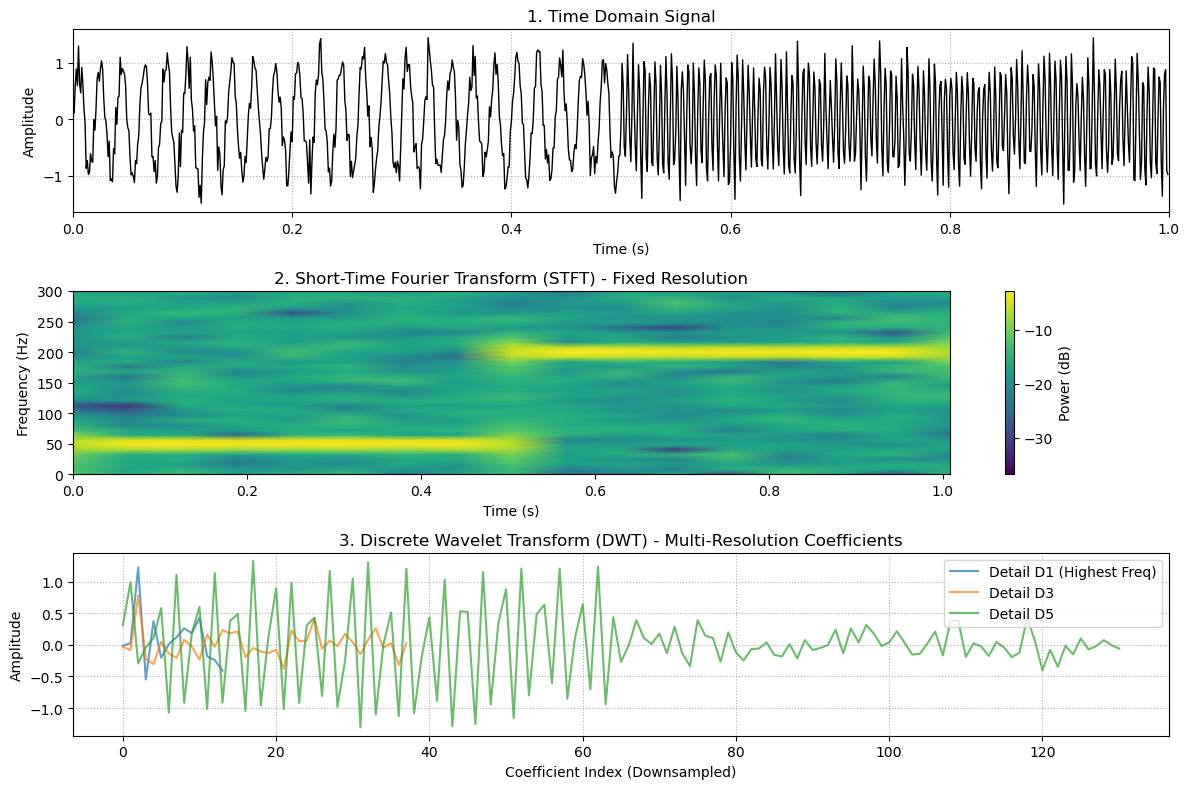


--- Interpretation ---
STFT (Plot 2): Shows both frequencies (50Hz, 200Hz) clearly over time.
DWT (Plot 3):
  - Coefficients are downsampled (fewer points).
  - Different Detail levels (D1, D3, D5) capture different frequency bands.
  - D5 (lower frequency band) would capture the 50Hz signal better.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
# 1.Create a Non_Stationary Test Signal
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False) # 1 second duration
f1 = 50    # First frequency (0 to 0.5s)
f2 = 200   # Second frequency (0.5s to 1s)

# Create the signal: 50Hz then 200Hz
x = np.concatenate([
    1.0 * np.sin(2 * np.pi * f1 * t[:fs//2]),  # 0 to 0.5s
    1.0 * np.sin(2 * np.pi * f2 * t[fs//2:])   # 0.5s to 1s
])

# Add some noise
x += 0.2 * np.random.randn(len(x))

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Non-Stationary Signal (50Hz then 200Hz)', color='k', linewidth=1)
plt.title('1. Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, linestyle=':')
plt.xlim(0, 1)

#STFT
# STFT requires fixed window size (NPERSEG)
# TRADE-OFF: A large window (e.g., fs/8) gives better frequency resolution, worse time resolution.
NPERSEG = fs // 8  # Window size for 125ms time resolution (1000/8)
f, t_stft, Zxx = signal.stft(x, fs, nperseg=NPERSEG)

plt.subplot(3, 1, 2)
# Convert complex magnitude to Power (dB) for visualization
plt.pcolormesh(t_stft, f, 10 * np.log10(np.abs(Zxx)), shading='gouraud')
plt.title(f'2. Short-Time Fourier Transform (STFT) - Fixed Resolution')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.ylim(0, 300) # Limit frequency range to relevant bands

# DWT
# We use Multi-Resolution Analysis (MRA) to decompose the signal
wavelet = 'db4' # Daubechies 4 wavelet (common choice)
levels = 7       # Decomposition levels

# Decomposition using DWT (yielding coefficients)
coeffs = pywt.wavedec(x, wavelet, level=levels)

# A simple visualization of the Detail Coefficients (high frequency to low frequency)
plt.subplot(3, 1, 3)
plt.plot(coeffs[1], label='Detail D1 (Highest Freq)', alpha=0.7) # D1 is high frequency detail
plt.plot(coeffs[3], label='Detail D3', alpha=0.7)
plt.plot(coeffs[5], label='Detail D5', alpha=0.7) # D5 is low frequency detail
plt.title(f'3. Discrete Wavelet Transform (DWT) - Multi-Resolution Coefficients')
plt.xlabel('Coefficient Index (Downsampled)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# --- Interpretation Note ---
print("\n--- Interpretation ---")
print("STFT (Plot 2): Shows both frequencies (50Hz, 200Hz) clearly over time.")
print("DWT (Plot 3):")
print(f"  - Coefficients are downsampled (fewer points).")
print(f"  - Different Detail levels (D1, D3, D5) capture different frequency bands.")
print(f"  - D5 (lower frequency band) would capture the 50Hz signal better.")